In [8]:
import os
from google.colab import drive

# Google Drive Mount
drive.mount('/content/drive')

# Change Directory
os.chdir("/content/drive/MyDrive/AI_Framework")

!nvidia-smi
!head /proc/cpuinfo
!head -n 3 /proc/meminfo

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
MemTotal:       13298580 kB
MemFree:         9001644 kB
MemAvailable:   11434508 kB


In [9]:
import logging
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras import layers, models
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler

# Log Setting
logging.basicConfig(format="%(asctime)s %(levelname)s %(message)s",
                    datefmt="%H:%M:%S",
                    level=logging.INFO)

# Read CSV File
df = pd.read_csv("Dataset.csv", encoding="utf-8")

print("=====df.shape=====")
print(df.shape, end='\n\n')
print("=====df.Label.value_counts()=====")
print(df.Label.value_counts(), end='\n\n')
print("=====df.columns=====")
print(df.columns, end='\n\n')

# Split Features and Labes
x = df.iloc[:, df.columns != "Label"]
y = df[["Label"]]  # 0 or 1 / BENIGN or ATTACK

# Split Train Data and Test Data
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    stratify=y,
                                                    shuffle=True,
                                                    test_size=0.20,
                                                    random_state=np.random.randint(10))

# Save Train Data and Test Data
train = pd.concat([x_train, y_train], axis=1, sort=False)
train.to_csv("Dataset_Train.csv", encoding="utf-8", index=False)
test = pd.concat([x_test, y_test], axis=1, sort=False)
test.to_csv("Dataset_Test.csv", encoding="utf-8", index=False)

# Delete x and y
del x, y


=====df.shape=====
(6235, 677)

=====df.Label.value_counts()=====
0    5329
1     906
Name: Label, dtype: int64

=====df.columns=====
Index(['aa', 'ab', 'ac', 'ad', 'ae', 'af', 'ag', 'ah', 'ai', 'aj',
       ...
       'zr', 'zs', 'zt', 'zu', 'zv', 'zw', 'zx', 'zy', 'zz', 'Label'],
      dtype='object', length=677)



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 25, 25, 32)        160       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        8256      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 64)          16448     
                                                                 
 flatten_2 (Flatten)         (None, 1024)             

08:05:40 INFO None


Epoch 1/10
141/141 [==============================] - 4s 23ms/step - loss: 0.2998 - sparse_categorical_accuracy: 0.9316 - val_loss: 0.0447 - val_sparse_categorical_accuracy: 0.9880
Epoch 2/10
141/141 [==============================] - 3s 21ms/step - loss: 0.0362 - sparse_categorical_accuracy: 0.9922 - val_loss: 0.0268 - val_sparse_categorical_accuracy: 0.9980
Epoch 3/10
141/141 [==============================] - 3s 22ms/step - loss: 0.0226 - sparse_categorical_accuracy: 0.9967 - val_loss: 0.0157 - val_sparse_categorical_accuracy: 0.9980
Epoch 4/10
141/141 [==============================] - 3s 22ms/step - loss: 0.0169 - sparse_categorical_accuracy: 0.9975 - val_loss: 0.0166 - val_sparse_categorical_accuracy: 0.9980
Epoch 5/10
141/141 [==============================] - 3s 22ms/step - loss: 0.0135 - sparse_categorical_accuracy: 0.9978 - val_loss: 0.0143 - val_sparse_categorical_accuracy: 0.9980
Epoch 6/10
141/141 [==============================] - 3s 21ms/step - loss: 0.0082 - sparse_cate

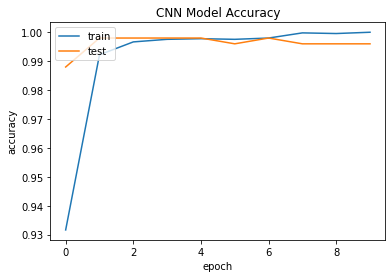

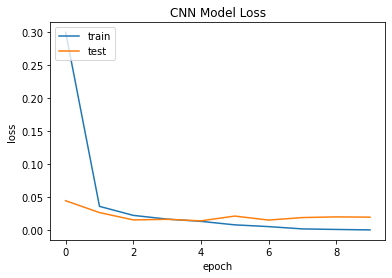

08:06:12 INFO Evaluation:
Loss: 0.29872432351112366
Accuracy : 0.9759422540664673

08:06:13 INFO 
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1066
           1       0.86      0.99      0.92       181

    accuracy                           0.98      1247
   macro avg       0.93      0.98      0.95      1247
weighted avg       0.98      0.98      0.98      1247



In [10]:
# Read CSV File
df = pd.read_csv("Dataset_Train.csv", encoding="utf-8")
df = df.sample(frac=1)

# Split Features and Labels
x = df.iloc[:, df.columns != "Label"]
y = df[["Label"]].to_numpy()

scaler = MinMaxScaler()
x = scaler.fit_transform(x)

x = x.reshape((x.shape[0], 26, 26))

# Create Model
model = models.Sequential()
model.add(layers.Conv2D(32, (2, 2), activation='relu', input_shape=(26, 26, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile Model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["sparse_categorical_accuracy"])

logging.info(model.summary())

plot_model(model, show_shapes=True)

# Model Training
history = model.fit(x, y, validation_split=0.1, epochs=10)

# Graph
plt.plot(history.history["sparse_categorical_accuracy"])
plt.plot(history.history["val_sparse_categorical_accuracy"])
plt.title("CNN Model Accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(["train", "test"], loc="upper left")
plt.show()

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("CNN Model Loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train", "test"], loc="upper left")
plt.show()

x_test = x_test.to_numpy()
x_test = x_test.reshape((x_test.shape[0], 26, 26))
y_test = y_test.to_numpy()

score = model.evaluate(x_test, y_test, verbose=False)
logging.info('Evaluation:\nLoss: {}\nAccuracy : {}\n'.format(score[0], score[1]))

# F1 score
y_pred = model.predict(x_test, batch_size=1024, verbose=False)
y_pred = np.argmax(y_pred, axis=1)

logging.info("\n{}".format(classification_report(y_test, y_pred)))